## Predict with a pre-trained model

In [1]:
from mxnet import nd
from mxnet import gluon
from mxnet.gluon import nn
from mxnet.gluon.data.vision import datasets, transforms
from IPython import display
import matplotlib.pyplot as plt

In [ ]:
ctx =

In [2]:
net = nn.Sequential()
net.add(nn.Conv2D(channels=6, kernel_size=5, activation='relu'),
        nn.MaxPool2D(pool_size=2, strides=2),
        nn.Conv2D(channels=16, kernel_size=3, activation='relu'),
        nn.MaxPool2D(pool_size=2, strides=2),
        nn.Flatten(),
        nn.Dense(120, activation="relu"),
        nn.Dense(84, activation="relu"),
        nn.Dense(10))
net.load_parameters('net.params')

## Predict(or inference)

In [4]:
transformer = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.13, 0.31)])

In [5]:
mnist_valid = datasets.FashionMNIST(train=False)
data, label = mnist_valid[:10]
preds = []
for x in data:
    x = transformer(x).expand_dims(axis=0)
    pred = net(x).argmax(axis=1)
    preds.append(pred.astype('int32').asscalar())


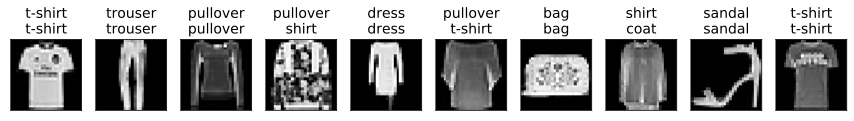

In [8]:
_, figs = plt.subplots(1, 10, figsize=(15, 15))
text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
               'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
display.set_matplotlib_formats('svg')
for f,x,yi,pyi in zip(figs, data, label, preds):
    f.imshow(x.reshape((28,28)).asnumpy(), cmap="gray")
    ax = f.axes
    ax.set_title(text_labels[yi]+'\n'+text_labels[pyi])
    ax.title.set_fontsize(14)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Predict with models from Gluon model zoo
with pretrained neural networks. resnet50_v2 has already trained on imagenet dataset
https://mxnet.apache.org/api/python/docs/api/gluon/model_zoo/index.html

In [9]:
from mxnet.gluon.model_zoo import vision as models
from mxnet.gluon.utils import download
from mxnet import image

net = models.resnet50_v2(pretrained=True)
url = 'http://data.mxnet.io/models/imagenet/synset.txt'
fname = download(url)
with open(fname, 'r') as f:
    text_labels = [' '.join(l.split()[1:]) for l in f]


download test image

In [ ]:
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/\
Golden_Retriever_medium-to-light-coat.jpg/\
365px-Golden_Retriever_medium-to-light-coat.jpg'
fname = download(url)
x = image.imread(fname)

- resize into 256
- center crop 224 x 224

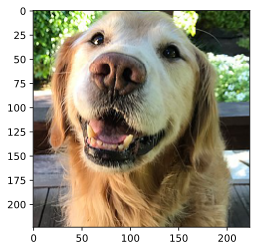

In [11]:
x = image.resize_short(x, 256)
x, _ = image.center_crop(x, (224,224))
plt.imshow(x.asnumpy())
plt.show()

order change: HWC -> CHW
add batch: B-CHW

In [15]:
def transform(data):
    data = data.transpose((2,0,1)).expand_dims(axis=0)
    rgb_mean = nd.array([0.485, 0.456, 0.406]).reshape(1,3,1,1)
    rbg_std = nd.array([0.229, 0.224, 0.225]).reshape(1,3,1,1)
    return (data.astype('float32')/255 - rgb_mean) / rbg_std

prob = net(transform(x)).softmax()
idx = prob.topk(k=5)[0]
for i in idx:
    i = int(i.asscalar())
    print('With prob = %.5f, it contains %s' % (
        prob[0,i].asscalar(), text_labels[i]
    ))

With prob = 0.98225, it contains golden retriever
With prob = 0.00816, it contains English setter
With prob = 0.00264, it contains Irish setter, red setter
With prob = 0.00221, it contains cocker spaniel, English cocker spaniel, cocker
With prob = 0.00181, it contains Labrador retriever


softmax gives all probabilities

In [18]:
prob.shape

(1, 1000)

In [19]:
prob


[[6.30452268e-09 1.35059590e-08 2.10789541e-09 4.71341099e-09
  3.44640672e-09 9.81340520e-09 1.32682398e-09 3.88384480e-09
  4.21048130e-09 2.92608759e-09 1.90991098e-10 5.38395328e-09
  4.45212756e-09 1.79443502e-10 6.03029016e-10 1.33252520e-09
  2.12248774e-09 3.50666074e-09 1.01425957e-09 2.72919376e-09
  3.88855670e-10 4.38578018e-09 4.73435957e-09 9.69968639e-09
  1.36930804e-08 1.12258522e-08 1.36317058e-09 8.95217944e-09
  4.43738513e-09 8.50298854e-09 1.36682923e-08 2.70847273e-08
  2.04236930e-08 5.09460518e-09 4.85535745e-09 3.53056606e-09
  9.98232785e-09 2.94774569e-08 3.55428842e-09 1.57855187e-08
  2.04447703e-09 1.97272043e-09 2.90213209e-09 1.13859566e-09
  1.83032400e-09 2.62523536e-09 2.10092477e-08 1.15954384e-08
  7.51784413e-09 1.07126341e-09 1.02251150e-08 1.54065010e-08
  4.34381286e-09 6.91442126e-10 1.49800383e-09 4.14405710e-09
  2.58255395e-09 1.62006519e-09 1.67180736e-09 3.76389186e-09
  3.92043331e-09 3.84803123e-09 1.13139553e-09 2.32160499e-10
  5.959